In [288]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.nn import sigmoid
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import Sequential, layers
from tensorflow.keras.losses import binary_crossentropy
from sklearn.utils import shuffle

In [289]:
# Shuffle the dataset as soon as you read the file
# make the train and test split in the data before training
# during training use the validation set to check accuracy
# print the test data accuracy and loss
# Draw loss / accuracy / confusion matrix graph

In [290]:
df=pd.read_csv("Raisin_Dataset.csv")
df = shuffle(df)
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
197,86545,350.127874,315.719520,0.432307,87512,0.785887,1070.062,Kecimen
454,61409,403.701295,209.365889,0.855007,67286,0.597393,1083.477,Besni
72,69006,379.317846,241.850291,0.770374,72895,0.697453,1086.857,Kecimen
638,101772,477.908944,273.404364,0.820195,104567,0.684338,1266.657,Besni
713,104728,495.671682,272.686734,0.835075,109157,0.730219,1316.398,Besni


In [291]:
#Next,we find the distribution of target class how many samples belong to each class in the target variable

In [292]:
df["Class"].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [293]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [294]:
cols = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter']


x = df[cols]
mean_x = x.mean()
std_x = x.std()

df[cols] = (x - mean_x) / std_x

df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02
mean,1.391480e-16,1.381611e-17,8.408089e-16,6.996872e-16,7.993606e-17,3.487581e-15,-5.329071e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.600353e+00,-1.769295e+00,-2.216037e+00,-4.792074e+00,-1.595492e+00,-5.978354e+00,-1.997458e+00
25%,-7.296048e-01,-7.367343e-01,-7.076972e-01,-4.403963e-01,-7.278233e-01,-5.356236e-01,-7.287140e-01
50%,-2.282473e-01,-1.993017e-01,-1.328240e-01,1.915877e-01,-2.338792e-01,1.469852e-01,-1.694802e-01
75%,4.416203e-01,5.451545e-01,5.081216e-01,6.757080e-01,4.216326e-01,6.636373e-01,5.204590e-01
max,3.775254e+00,4.880953e+00,4.756799e+00,1.999396e+00,4.587544e+00,2.542570e+00,5.595493e+00


In [295]:

targets = df[["Class"]]
inputs = df.drop(["Class"], axis= 1)
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 197 to 497
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    float64
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    float64
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
dtypes: float64(7)
memory usage: 56.2 KB


In [296]:
# one hot encoding the targets 
one_hot_targets = pd.get_dummies(targets)

labels = targets["Class"].unique()
labels.sort()
labels

array(['Besni', 'Kecimen'], dtype=object)

In [297]:
#Splitting the Data into Training and Testing Sets

In [298]:
train_inputs = inputs[:800]
train_targets = one_hot_targets[:800]

test_inputs  = inputs[800:]
test_targets = one_hot_targets[800:]

In [299]:
# converting into tensors for training
inputs_tf = tf.constant(train_inputs)
targets_tf = tf.cast(tf.constant(train_targets), tf.float64)

In [300]:
#build the model,using simple neural network of single dense layer with 2 neurons.

In [301]:
model = Sequential([
    layers.Dense(2, activation='sigmoid'),
])

In [302]:
#This will track accuracy during training.
model.compile(
    loss = binary_crossentropy,
    optimizer = SGD(learning_rate=0.001),
    metrics = ["accuracy"]
)

In [303]:
#model training and evaluatiom
history = model.fit(
    inputs_tf,
    targets_tf,
    epochs = 100,
    batch_size = 100,
    validation_split = 0.3
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8345 - loss: 0.5582 - val_accuracy: 0.7875 - val_loss: 0.5678
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8124 - loss: 0.5653 - val_accuracy: 0.7875 - val_loss: 0.5672
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8152 - loss: 0.5548 - val_accuracy: 0.7917 - val_loss: 0.5665
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8137 - loss: 0.5653 - val_accuracy: 0.7917 - val_loss: 0.5658
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8020 - loss: 0.5678 - val_accuracy: 0.7917 - val_loss: 0.5652
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8244 - loss: 0.5590 - val_accuracy: 0.7917 - val_loss: 0.5645
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8182 - loss: 0.5575 - val_accuracy: 0.7917 - val_loss: 0.5639
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8110 - loss: 0.5603 - val_accuracy: 0.7958 - val_loss: 0.

In [304]:

model.save("./rasin_summary.h5", save_format="h5")

In [305]:
#The model's accuracy is tested on the test set, 
#it says how well our model performs on unseen data

In [306]:
loss, accuracy = model.test_on_batch(test_inputs, test_targets)
print(accuracy*100)

81.76470398902893


In [307]:
#After evaluation, we make predictions on the training data.

In [308]:
preds = model.predict(inputs_tf)
preds_simplified = []
targets_simplified = []

for pred in preds:
    index = (tf.where(pred == max(pred)))
    index = (int(index[0][0]))
    preds_simplified.append(index)
    
for target in targets_tf:
    index = (tf.where(target == max(target)))
    index = (int(index[0][0]))
    targets_simplified.append(index)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [309]:
# Confusion Matrix: Shows the performance of the model by comparing predicted and actual class labels.
#A heatmap is generated to visualize the confusion matrix.

<Axes: >

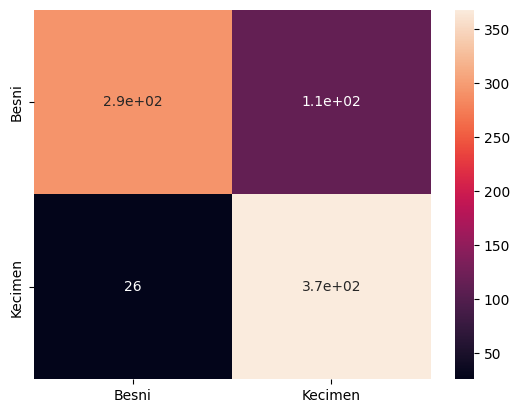

In [310]:
import seaborn as sns

confusion = tf.math.confusion_matrix(labels=targets_simplified, predictions= preds_simplified)
conf_df = pd.DataFrame(confusion, labels, labels)
sns.heatmap(conf_df, annot=True)

In [311]:

model = tf.keras.models.load_model('./rasin_summary.h5')

In [312]:
#Visualizing the Training History
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.821429,0.563739,0.787500,0.567836
1,0.821429,0.563120,0.787500,0.567166
2,0.821429,0.562495,0.791667,0.566500
3,0.819643,0.561877,0.791667,0.565842
4,0.821429,0.561263,0.791667,0.565181
...,...,...,...,...
95,0.832143,0.514905,0.816667,0.515897
96,0.832143,0.514493,0.816667,0.515452
97,0.832143,0.514071,0.816667,0.515001
98,0.830357,0.513645,0.816667,0.514557


In [313]:
#plots the training and validation loss over epochs to show how the model is learning.

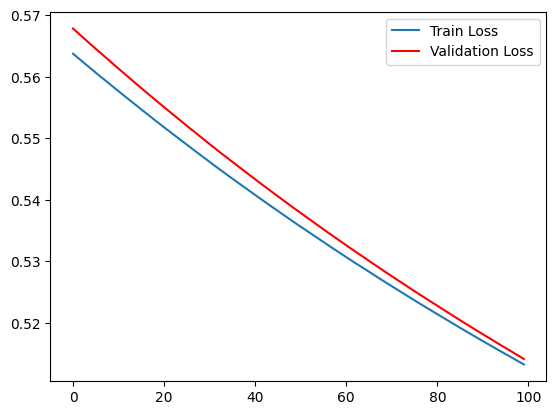

In [314]:
plt.plot(range(100),history_df["loss"])
plt.plot(range(100),history_df["val_loss"], c="red")
plt.legend(["Train Loss", "Validation Loss"])

In [315]:
#plots the training and validation accuracy over epochs to demonstrate the model's performance.

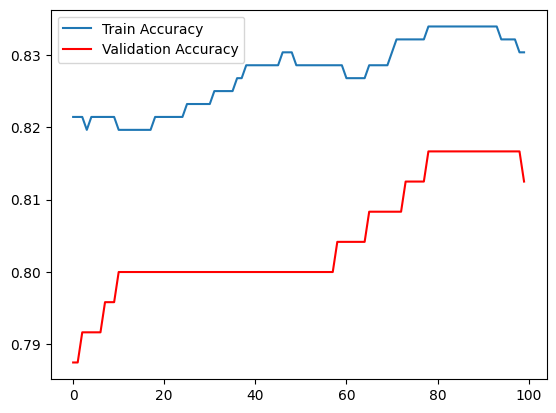

In [316]:
plt.plot(range(100),history_df["accuracy"])
plt.plot(range(100),history_df["val_accuracy"], c="red")
plt.legend(["Train Accuracy", "Validation Accuracy"])

In [317]:
new_sample = {
    'Area': 1000,
    'MajorAxisLength': 30,
    'MinorAxisLength': 25,
    'Eccentricity': 0.9,
    'ConvexArea': 950,
    'Extent': 0.85,
    'Perimeter': 150
}

new_sample_df = pd.DataFrame([new_sample])

new_sample_df = (new_sample_df - mean_x) / std_x


new_sample_tf = tf.constant(new_sample_df, dtype=tf.float64)


predictions = model.predict(new_sample_tf)

predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class for the new sample: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class for the new sample: 1
